# Testing co-location rate and spatial co-location rate

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from colocation.modified_wang_colocation import ModifiedWangColocation
from colocation import utils

## Functions

## Read data

In [2]:
locations = pd.read_csv("data/locations.csv")
locations.head()

,locationID,x,y
0,0,0,0
1,1,4,2
2,2,6,8
3,3,14,4
4,4,8,16


In [3]:
data = pd.read_csv("data/data.csv")
data.head()

,userID,locationID,time
0,x,0,0
1,y,0,0
2,x,1,5
3,y,1,6
4,x,2,8


## Testing ModifiedWangColocation class

In [4]:
mwc = ModifiedWangColocation(data, locations, x_tolerance=1, t_tolerance=1)

In [5]:
mwc.data["userID"].unique()

array(['x', 'y'], dtype=object)

In [6]:
mwc.get_CoL("x", "y")

0.3333333333333333

In [7]:
mwc.get_SCoL("x", "y")

0.12499999999999999

In [8]:
cols = []

for dx in range(10):
    for dt in range(10):
        mwc = ModifiedWangColocation(data, locations,
                                     x_tolerance=dx, t_tolerance=dt)
        col = mwc.get_CoL("x", "y")
        cols.append({"dx": dx, "dt": dt, "colocation_rate": col})

In [9]:
output = pd.DataFrame(cols)

In [10]:
output.head()

,dx,dt,colocation_rate
0,0,0,0.333333
1,0,1,0.333333
2,0,2,0.200000
3,0,3,0.250000
4,0,4,0.200000


In [11]:
pivotted = output.pivot(index="dx", columns="dt", values="colocation_rate")
pivotted = pivotted.iloc[::-1]

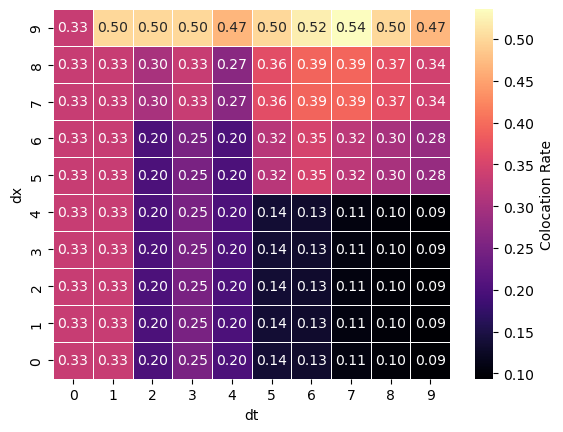

In [12]:
sns.heatmap(pivotted, annot=True, fmt=".2f", linewidths=0.5,
            cmap="magma", cbar_kws={"label": "Colocation Rate"})
plt.show()

In [13]:
cols = utils.run_dx_dt(0, 9, 10, 0, 9, 10, data, locations, ModifiedWangColocation)

In [14]:
cols = pd.DataFrame(cols)
cols.head()

,dx,dt,colocation_rate
0,0.0,0.0,0.333333
1,0.0,1.0,0.333333
2,0.0,2.0,0.200000
3,0.0,3.0,0.250000
4,0.0,4.0,0.200000


In [15]:
pivotted = utils.pivot_outputs(output)

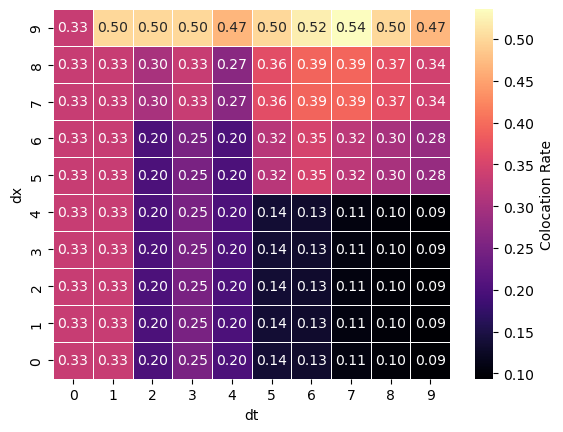

In [16]:
sns.heatmap(pivotted, annot=True, fmt=".2f", linewidths=0.5,
            cmap="magma", cbar_kws={"label": "Colocation Rate"})
plt.show()